In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from collections import defaultdict
import pandas as pd

train_dir = '../data/train'
val_dir = '../data/validation'

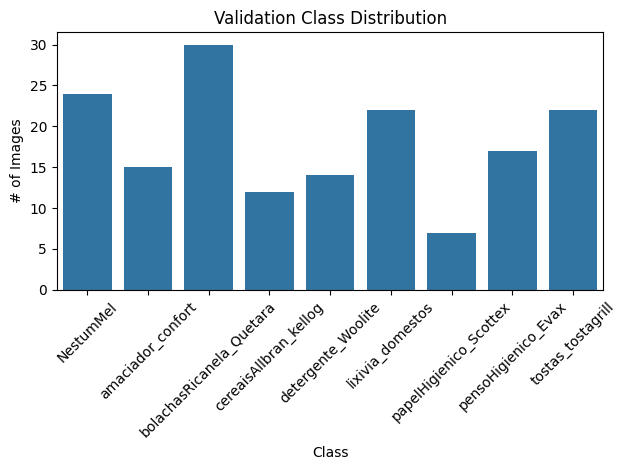

Average Image Sizes per Class:
                                   0           1
NestumMel                 111.169374  102.635731
amaciador_confort         148.279343  139.699531
bolachasRicanela_Quetara  114.635321  105.775229
cafeAlma_Nicola            81.025641   76.363636
cereaisAllbran_kellog     128.284382  119.230769
detergente_Woolite        148.831019  141.481481
lixivia_domestos          134.856132  123.120283
papelHigienico_Scottex    261.208763  236.574742
tostas_tostagrill         107.855491  101.531792
Average Mask Coverage per Class:
                      Class  Avg Coverage
0                 NestumMel      0.512732
1         amaciador_confort      0.375876
2  bolachasRicanela_Quetara      0.526780
3           cafeAlma_Nicola      0.500262
4     cereaisAllbran_kellog      0.513251
5        detergente_Woolite      0.362320
6          lixivia_domestos      0.347345
7    papelHigienico_Scottex      0.512409
8         tostas_tostagrill      0.489861


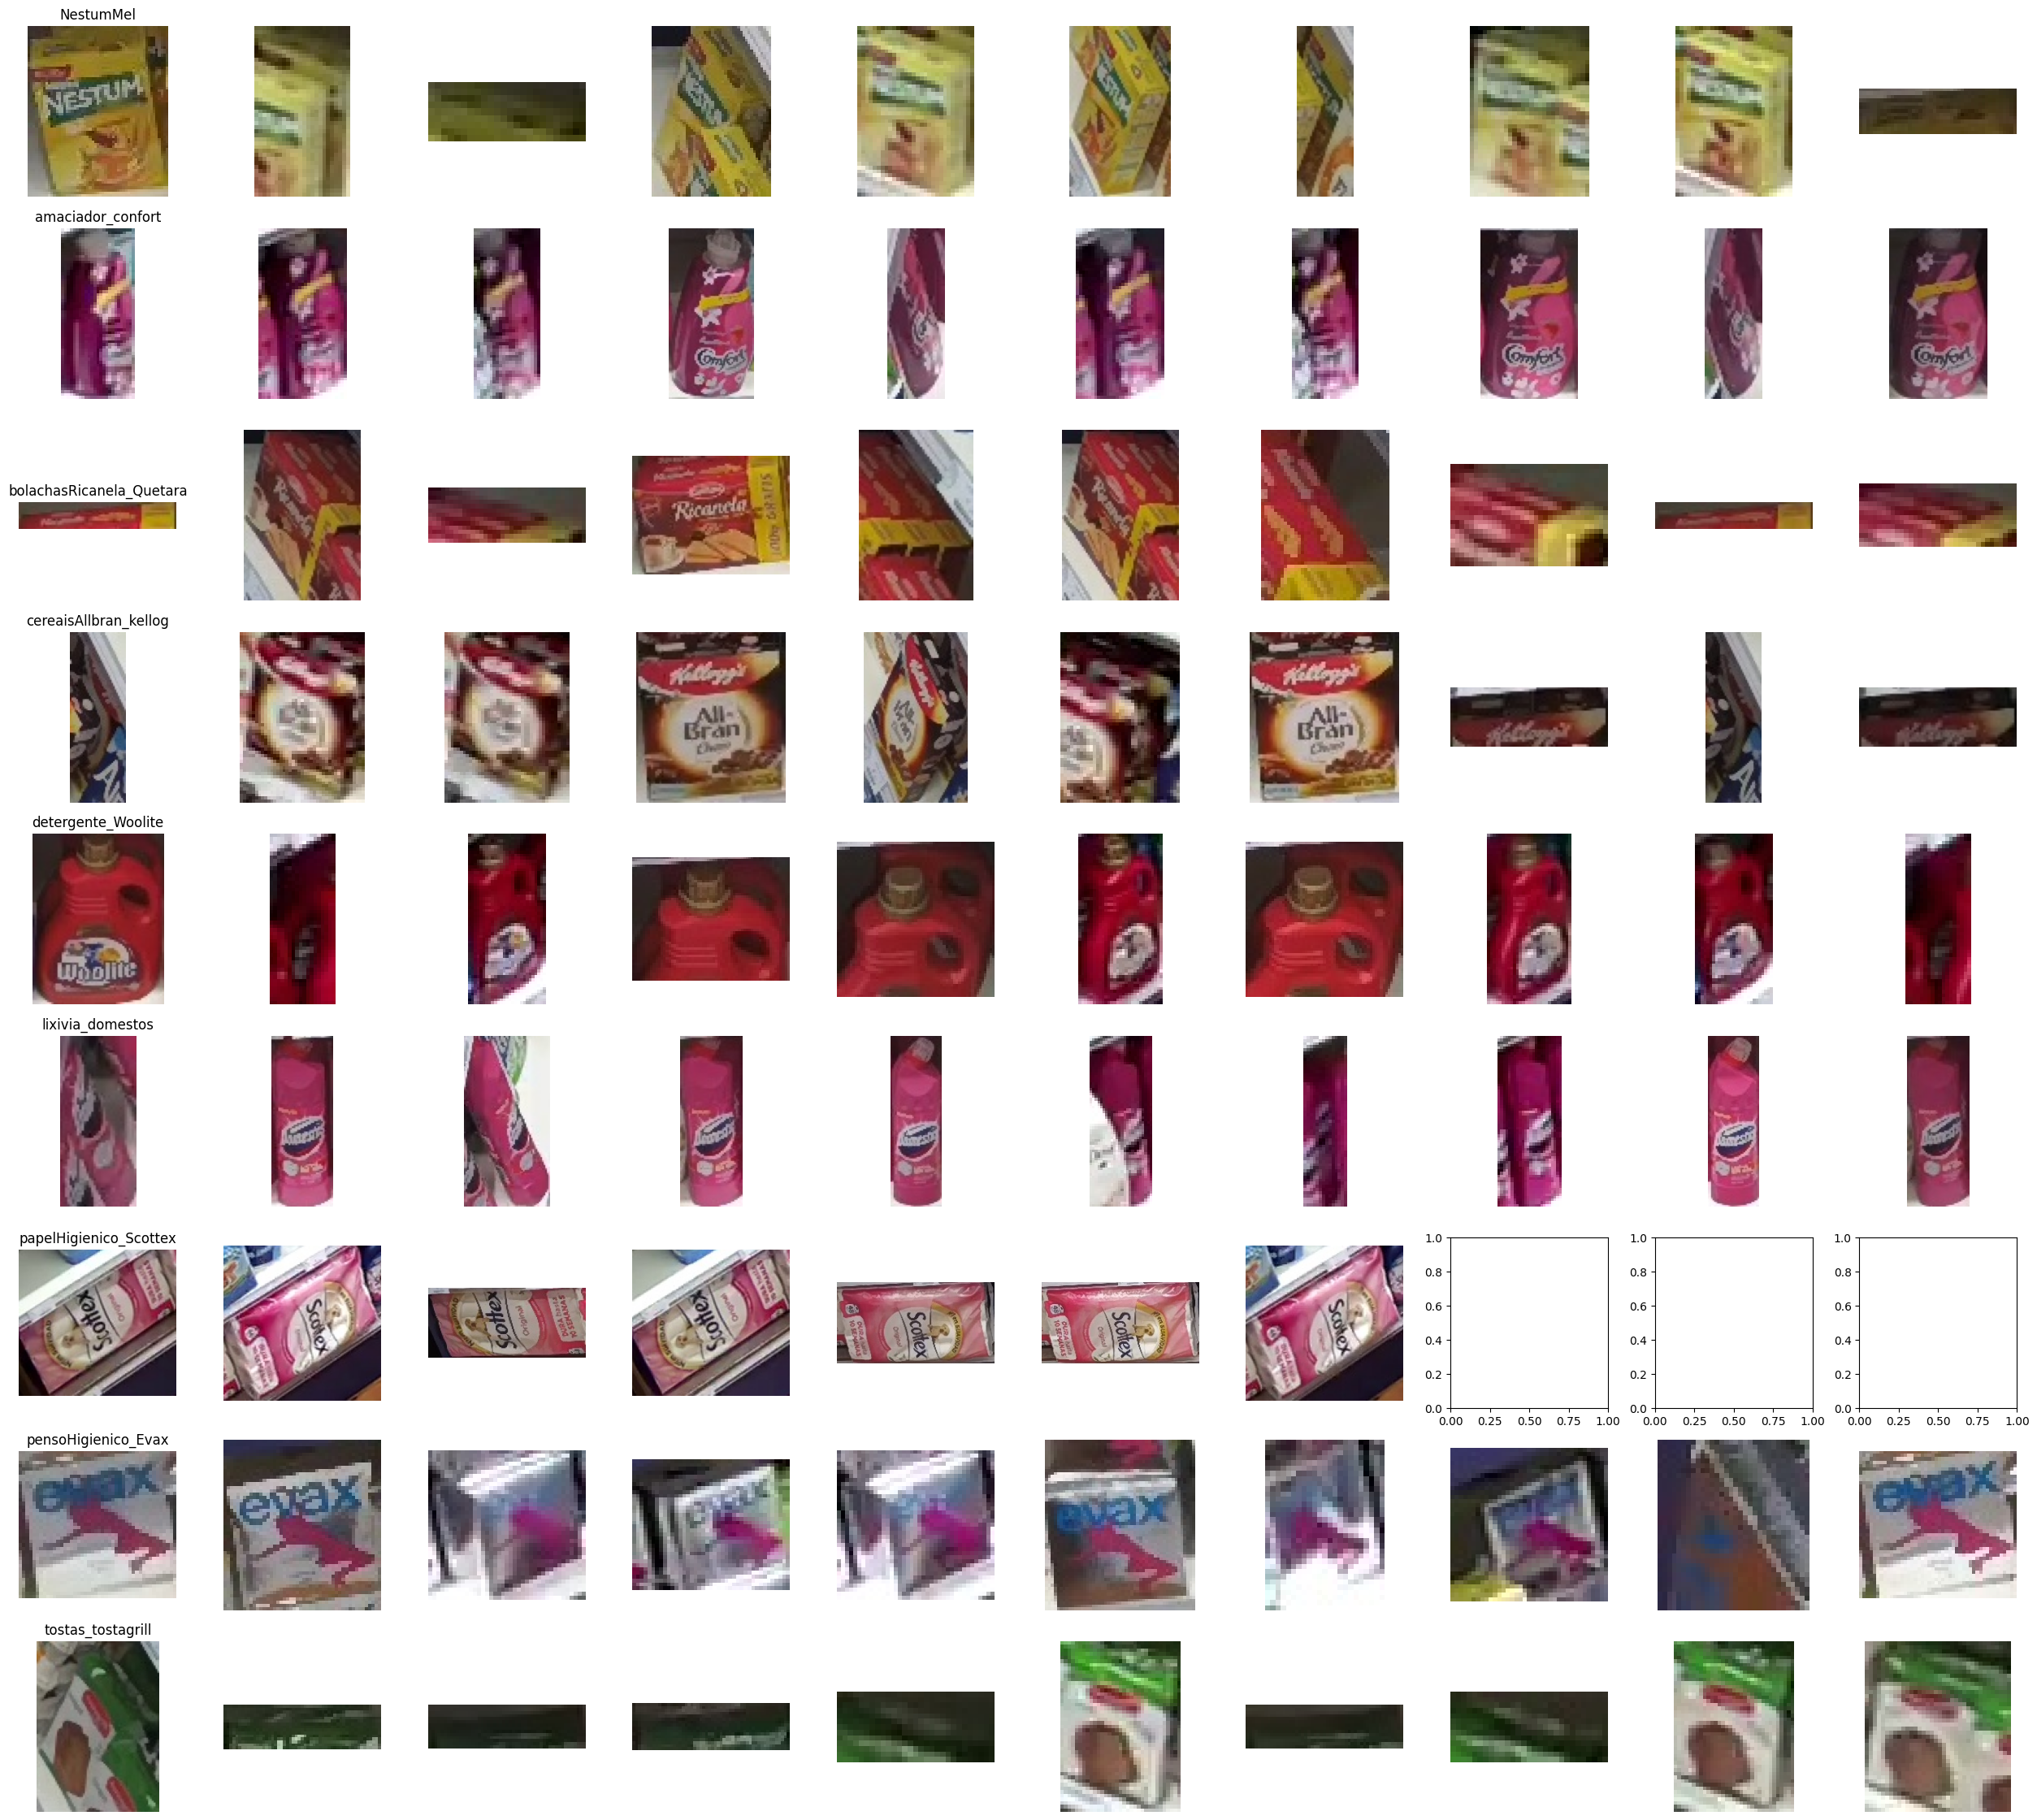

In [3]:
# Distribution per class
def class_distribution(data_dir):
    distribution = {}
    for class_name in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_name)
        count = len([f for f in os.listdir(class_path) if (f.endswith('.png') or f.endswith('.jpg')) and not f.endswith('_mask.png')])
        distribution[class_name] = count
    return distribution

# Image statistics
def compute_image_stats(data_dir):
    sizes = defaultdict(list)
    mask_coverage = defaultdict(list)

    for class_name in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_name)
        for file in os.listdir(class_path):
            if file.endswith('_mask.png'):
                continue
            img_path = os.path.join(class_path, file)
            img = Image.open(img_path).convert('RGB')
            sizes[class_name].append(img.size)

            # Check mask
            base_name = file[:-4]
            mask_path = os.path.join(class_path, base_name + '_mask.png')
            if os.path.exists(mask_path):
                mask = Image.open(mask_path).convert('L')
                mask_np = np.array(mask) > 0
                coverage = np.sum(mask_np) / mask_np.size
                mask_coverage[class_name].append(coverage)

    return sizes, mask_coverage

# Plot class distribution
def plot_distribution(counts, title):
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.title(title)
    plt.ylabel("# of Images")
    plt.xlabel("Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Grid of images per class
def show_sample_images(data_dir, num_classes=9, samples_per_class=10):
    classes = sorted(os.listdir(data_dir))[:num_classes]
    fig, axs = plt.subplots(num_classes, samples_per_class, figsize=(samples_per_class*2.5, num_classes*2.5))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = [f for f in os.listdir(class_path) if (f.endswith('.png') or f.endswith('.jpg')) and not f.endswith('_mask.png')][:samples_per_class]
        for j, img_file in enumerate(images):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path).convert('RGB')
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Run EDA
train_counts = class_distribution(train_dir)
val_counts = class_distribution(val_dir)
plot_distribution(train_counts, "Training Class Distribution")
plot_distribution(val_counts, "Validation Class Distribution")

sizes, coverage = compute_image_stats(train_dir)

# Image size stats
avg_sizes = {cls: np.mean(sizes[cls], axis=0) for cls in sizes}
print("Average Image Sizes per Class:")
print(pd.DataFrame(avg_sizes).T)

# Mask coverage stats
avg_coverage = {cls: np.mean(coverage[cls]) for cls in coverage}
print("Average Mask Coverage per Class:")
print(pd.DataFrame(avg_coverage.items(), columns=["Class", "Avg Coverage"]))

# Show image grid
show_sample_images(train_dir)
show_sample_images(val_dir)

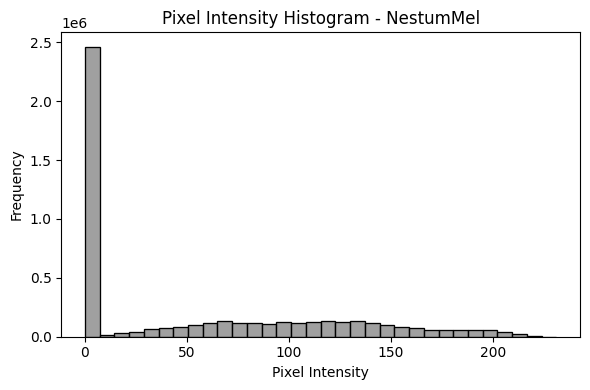

KeyboardInterrupt: 

<Figure size 600x400 with 0 Axes>

In [4]:
# Per-class pixel intensity histograms
def plot_intensity_histograms(data_dir):
    classes = sorted(os.listdir(data_dir))
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        pixels = []
        for fname in os.listdir(class_path):
            if fname.endswith('_mask.png'):
                continue
            img_path = os.path.join(class_path, fname)
            img = Image.open(img_path).convert('L')
            pixels.extend(np.array(img).flatten())

        plt.figure(figsize=(6, 4))
        sns.histplot(pixels, bins=32, kde=False, color='gray')
        plt.title(f"Pixel Intensity Histogram - {class_name}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

plot_intensity_histograms(train_dir)

Extracting features from Training set...
Extracting features from Validation set...
Extracting features from Validation set...
Train features shape: (450, 512)
Validation features shape: (316, 512)
Computing t-SNE for training set...
Train features shape: (450, 512)
Validation features shape: (316, 512)
Computing t-SNE for training set...
Computing t-SNE for validation set...
Computing t-SNE for validation set...


Train classes: ['NestumMel', 'amaciador_confort', 'bolachasRicanela_Quetara', 'cafeAlma_Nicola', 'cereaisAllbran_kellog', 'detergente_Woolite', 'lixivia_domestos', 'papelHigienico_Scottex', 'tostas_tostagrill']
Val classes: ['NestumMel', 'amaciador_confort', 'bolachasRicanela_Quetara', 'cereaisAllbran_kellog', 'detergente_Woolite', 'lixivia_domestos', 'papelHigienico_Scottex', 'pensoHigienico_Evax', 'tostas_tostagrill']
Classes match: False
Creating combined plot...
Combined features shape: (766, 512)
Using perplexity: 30


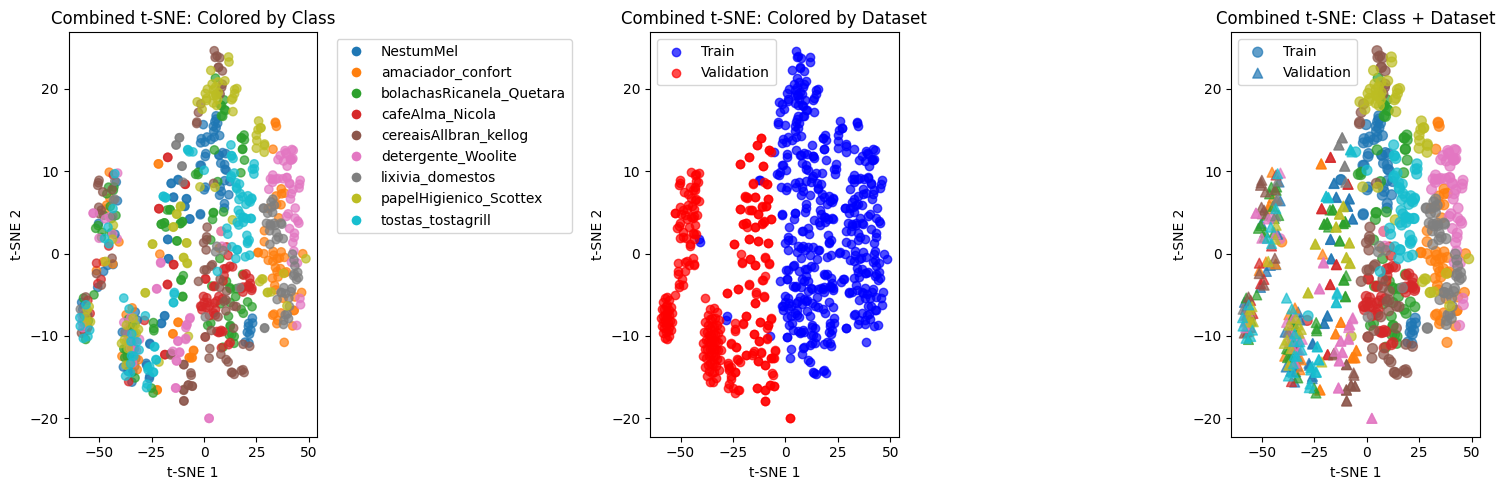

Combined plot completed!


In [4]:
# TSNE Embeddings using pretrained ResNet features for both train and validation
import torch
from torchvision import models, transforms
from sklearn.manifold import TSNE

# Use pretrained ResNet18
resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # Remove FC
resnet.eval()

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

def extract_features(data_dir, dataset_name):
    """Extract features from images in a directory"""
    features, labels, classes = [], [], sorted(os.listdir(data_dir))
    class_to_idx = {cls: i for i, cls in enumerate(classes)}
    
    print(f"Extracting features from {dataset_name}...")
    for cls in classes:
        class_path = os.path.join(data_dir, cls)
        # Limit to 50 images per class to speed up computation
        files = [f for f in os.listdir(class_path) if not f.endswith('_mask.png') and (f.endswith('.png') or f.endswith('.jpg'))]
        files = files[:50]  # Limit for faster computation
        
        for fname in files:
            img_path = os.path.join(class_path, fname)
            try:
                img = Image.open(img_path).convert('RGB')
                x = transform(img).unsqueeze(0)
                with torch.no_grad():
                    feat = resnet(x).squeeze().numpy()
                features.append(feat)
                labels.append(class_to_idx[cls])
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                continue
    
    return np.array(features), np.array(labels), classes

# Extract features from both datasets
train_features, train_labels, train_classes = extract_features(train_dir, "Training set")
val_features, val_labels, val_classes = extract_features(val_dir, "Validation set")

print(f"Train features shape: {train_features.shape}")
print(f"Validation features shape: {val_features.shape}")

# Compute t-SNE for training set
if len(train_features) > 5:  # Ensure we have enough samples
    print("Computing t-SNE for training set...")
    perplexity_train = min(30, len(train_features) - 1)
    train_tsne = TSNE(n_components=2, perplexity=perplexity_train, random_state=42).fit_transform(train_features)
    
    # Plot training set t-SNE
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(train_tsne[:, 0], train_tsne[:, 1], 
                         c=train_labels, cmap='tab10', alpha=0.7)
    plt.title("t-SNE of Training Set Features (ResNet18)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    
    # Create custom legend with fixed colors
    import matplotlib.pyplot as plt
    colors = plt.cm.tab10(np.linspace(0, 1, len(train_classes)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], 
                         markersize=8, label=train_classes[i]) for i in range(len(train_classes))]
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Compute t-SNE for validation set
if len(val_features) > 5:  # Ensure we have enough samples
    print("Computing t-SNE for validation set...")
    perplexity_val = min(30, len(val_features) - 1)
    val_tsne = TSNE(n_components=2, perplexity=perplexity_val, random_state=42).fit_transform(val_features)
    
    # Plot validation set t-SNE
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(val_tsne[:, 0], val_tsne[:, 1], 
                         c=val_labels, cmap='tab10', alpha=0.7)
    plt.title("t-SNE of Validation Set Features (ResNet18)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    
    # Create custom legend with fixed colors
    colors = plt.cm.tab10(np.linspace(0, 1, len(val_classes)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], 
                         markersize=8, label=val_classes[i]) for i in range(len(val_classes))]
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Combined plot if both datasets have the same classes
print(f"Train classes: {train_classes}")
print(f"Val classes: {val_classes}")
print(f"Classes match: {train_classes == val_classes}")

if len(train_features) > 5 and len(val_features) > 5:
    print("Creating combined plot...")
    
    # Combine features and create dataset labels
    combined_features = np.vstack([train_features, val_features])
    combined_class_labels = np.hstack([train_labels, val_labels])
    combined_dataset_labels = np.hstack([
        np.zeros(len(train_features)),  # 0 for train
        np.ones(len(val_features))      # 1 for val
    ])
    
    print(f"Combined features shape: {combined_features.shape}")
    perplexity_combined = min(30, len(combined_features) - 1)
    print(f"Using perplexity: {perplexity_combined}")
    
    combined_tsne = TSNE(n_components=2, perplexity=perplexity_combined, random_state=42).fit_transform(combined_features)
    
    plt.figure(figsize=(15, 5))
    
    # Plot by class
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(combined_tsne[:, 0], combined_tsne[:, 1], 
                         c=combined_class_labels, cmap='tab10', alpha=0.7)
    plt.title("Combined t-SNE: Colored by Class")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    colors = plt.cm.tab10(np.linspace(0, 1, len(train_classes)))
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], 
                         markersize=8, label=train_classes[i]) for i in range(len(train_classes))]
    plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot by dataset
    plt.subplot(1, 3, 2)
    colors_dataset = ['blue', 'red']
    labels_dataset = ['Train', 'Validation']
    for i, (color, label) in enumerate(zip(colors_dataset, labels_dataset)):
        mask = combined_dataset_labels == i
        plt.scatter(combined_tsne[mask, 0], combined_tsne[mask, 1], 
                   c=color, alpha=0.7, label=label)
    plt.title("Combined t-SNE: Colored by Dataset")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend()
    
    # Plot with both class and dataset info
    plt.subplot(1, 3, 3)
    train_mask = combined_dataset_labels == 0
    val_mask = combined_dataset_labels == 1
    
    plt.scatter(combined_tsne[train_mask, 0], combined_tsne[train_mask, 1], 
               c=combined_class_labels[train_mask], cmap='tab10', alpha=0.7, 
               marker='o', s=50, label='Train')
    plt.scatter(combined_tsne[val_mask, 0], combined_tsne[val_mask, 1], 
               c=combined_class_labels[val_mask], cmap='tab10', alpha=0.7, 
               marker='^', s=50, label='Validation')
    
    plt.title("Combined t-SNE: Class + Dataset")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    print("Combined plot completed!")
else:
    print("Not enough samples for combined plot")

In [ ]:
# Compare Multiple Backbones for Train-Validation Feature Alignment
import torch
from torchvision import models, transforms
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

def get_backbone_models():
    """Return dictionary of different backbone models"""
    backbones = {}
    
    # ResNet family
    resnet18 = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
    backbones['ResNet18'] = torch.nn.Sequential(*list(resnet18.children())[:-1])
    
    # resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
    # backbones['ResNet50'] = torch.nn.Sequential(*list(resnet50.children())[:-1])
    
    # EfficientNet
    efficientnet_b0 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
    backbones['EfficientNet-B0'] = torch.nn.Sequential(*list(efficientnet_b0.children())[:-1])
    
    # MobileNet
    mobilenet_v3 = models.mobilenet_v3_large(weights=models.MobileNet_V3_Large_Weights.IMAGENET1K_V1)
    backbones['MobileNetV3'] = torch.nn.Sequential(*list(mobilenet_v3.children())[:-1])
    
    # VGG
    vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
    backbones['VGG16'] = vgg16.features
    
    return backbones

def extract_features_with_backbone(data_dir, dataset_name, backbone, backbone_name):
    """Extract features using a specific backbone"""
    backbone.eval()
    
    # Adjust transform based on backbone
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    features, labels, classes = [], [], sorted(os.listdir(data_dir))
    class_to_idx = {cls: i for i, cls in enumerate(classes)}
    
    print(f"Extracting features from {dataset_name} using {backbone_name}...")
    
    for cls in classes:
        class_path = os.path.join(data_dir, cls)
        files = [f for f in os.listdir(class_path) if not f.endswith('_mask.png') and not f.endswith('predmask.png') and (f.endswith('.png') or f.endswith('.jpg'))]
        files = files[:30]  # Limit for faster computation
        
        for fname in files:
            img_path = os.path.join(class_path, fname)
            try:
                img = Image.open(img_path).convert('RGB')
                x = transform(img).unsqueeze(0)
                
                with torch.no_grad():
                    feat = backbone(x)
                    
                    # Handle different output shapes
                    if feat.dim() > 2:
                        feat = torch.nn.functional.adaptive_avg_pool2d(feat, (1, 1))
                    feat = feat.squeeze().numpy()
                    
                    # Ensure 1D feature vector
                    if feat.ndim > 1:
                        feat = feat.flatten()
                    
                features.append(feat)
                labels.append(class_to_idx[cls])
                
            except Exception as e:
                print(f"Error processing {img_path} with {backbone_name}: {e}")
                continue
    
    return np.array(features), np.array(labels), classes

def compute_alignment_metrics(train_features, val_features, train_labels, val_labels, classes):
    """Compute various alignment metrics between train and validation features"""
    metrics = {}
    
    # 1. Per-class centroid distance
    class_distances = []
    for class_idx in range(len(classes)):
        train_mask = train_labels == class_idx
        val_mask = val_labels == class_idx
        
        if np.sum(train_mask) > 0 and np.sum(val_mask) > 0:
            train_centroid = np.mean(train_features[train_mask], axis=0)
            val_centroid = np.mean(val_features[val_mask], axis=0)
            distance = np.linalg.norm(train_centroid - val_centroid)
            class_distances.append(distance)
    
    metrics['avg_class_centroid_distance'] = np.mean(class_distances)
    metrics['std_class_centroid_distance'] = np.std(class_distances)
    
    # 2. Overall centroid distance
    train_overall_centroid = np.mean(train_features, axis=0)
    val_overall_centroid = np.mean(val_features, axis=0)
    metrics['overall_centroid_distance'] = np.linalg.norm(train_overall_centroid - val_overall_centroid)
    
    # 3. Distribution alignment using MMD (simplified)
    # Sample random pairs for efficiency
    n_samples = min(100, len(train_features), len(val_features))
    train_sample_idx = np.random.choice(len(train_features), n_samples, replace=False)
    val_sample_idx = np.random.choice(len(val_features), n_samples, replace=False)
    
    train_sample = train_features[train_sample_idx]
    val_sample = val_features[val_sample_idx]
    
    # Compute pairwise distances
    train_train_dist = pairwise_distances(train_sample, train_sample).mean()
    val_val_dist = pairwise_distances(val_sample, val_sample).mean()
    train_val_dist = pairwise_distances(train_sample, val_sample).mean()
    
    # Simple MMD estimate
    metrics['mmd_estimate'] = train_train_dist + val_val_dist - 2 * train_val_dist
    
    return metrics

# Test all backbones
backbones = get_backbone_models()
results = {}

for backbone_name, backbone in backbones.items():
    print(f"\n{'='*50}")
    print(f"Testing {backbone_name}")
    print(f"{'='*50}")
    
    try:
        # Extract features
        train_features, train_labels, train_classes = extract_features_with_backbone(
            train_dir, "Training", backbone, backbone_name)
        val_features, val_labels, val_classes = extract_features_with_backbone(
            val_dir, "Validation", backbone, backbone_name)
        
        print(f"Train features shape: {train_features.shape}")
        print(f"Val features shape: {val_features.shape}")
        
        # Compute alignment metrics
        metrics = compute_alignment_metrics(train_features, val_features, train_labels, val_labels, train_classes)
        
        results[backbone_name] = {
            'metrics': metrics,
            'train_features': train_features,
            'val_features': val_features,
            'train_labels': train_labels,
            'val_labels': val_labels,
            'feature_dim': train_features.shape[1]
        }
        
        print(f"Feature dimension: {train_features.shape[1]}")
        print(f"Avg class centroid distance: {metrics['avg_class_centroid_distance']:.4f}")
        print(f"Overall centroid distance: {metrics['overall_centroid_distance']:.4f}")
        print(f"MMD estimate: {metrics['mmd_estimate']:.4f}")
        
    except Exception as e:
        print(f"Error with {backbone_name}: {e}")
        continue

print(f"\n{'='*60}")
print("SUMMARY - Backbone Comparison")
print(f"{'='*60}")


Testing ResNet18
Extracting features from Training using ResNet18...
Extracting features from Validation using ResNet18...
Extracting features from Validation using ResNet18...
Train features shape: (270, 512)
Val features shape: (163, 512)
Feature dimension: 512
Avg class centroid distance: 14.9669
Overall centroid distance: 11.0681
MMD estimate: -6.2956

Testing EfficientNet-B0
Extracting features from Training using EfficientNet-B0...
Train features shape: (270, 512)
Val features shape: (163, 512)
Feature dimension: 512
Avg class centroid distance: 14.9669
Overall centroid distance: 11.0681
MMD estimate: -6.2956

Testing EfficientNet-B0
Extracting features from Training using EfficientNet-B0...
Extracting features from Validation using EfficientNet-B0...
Extracting features from Validation using EfficientNet-B0...
Train features shape: (270, 1280)
Val features shape: (163, 1280)
Feature dimension: 1280
Avg class centroid distance: 11.2615
Overall centroid distance: 6.7507
MMD estim

In [7]:
# Visualize and Rank Backbone Results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison DataFrame
comparison_data = []
for backbone_name, data in results.items():
    metrics = data['metrics']
    comparison_data.append({
        'Backbone': backbone_name,
        'Avg_Class_Centroid_Distance': metrics['avg_class_centroid_distance'],
        'Overall_Centroid_Distance': metrics['overall_centroid_distance'], 
        'MMD_Estimate': metrics['mmd_estimate'],
        'Feature_Dimension': data['feature_dim']
    })

df_comparison = pd.DataFrame(comparison_data)

# Normalize metrics for ranking (lower is better for all metrics)
df_normalized = df_comparison.copy()
for col in ['Avg_Class_Centroid_Distance', 'Overall_Centroid_Distance', 'MMD_Estimate']:
    df_normalized[f'{col}_norm'] = (df_comparison[col] - df_comparison[col].min()) / (df_comparison[col].max() - df_comparison[col].min())

# Compute composite score (lower is better)
df_normalized['Composite_Score'] = (
    df_normalized['Avg_Class_Centroid_Distance_norm'] * 0.4 +
    df_normalized['Overall_Centroid_Distance_norm'] * 0.3 +
    df_normalized['MMD_Estimate_norm'] * 0.3
)

# Sort by composite score
df_ranked = df_normalized.sort_values('Composite_Score')

print("Backbone Ranking (Best to Worst Train-Val Alignment):")
print("="*60)
for i, (_, row) in enumerate(df_ranked.iterrows()):
    print(f"{i+1}. {row['Backbone']}")
    print(f"   Composite Score: {row['Composite_Score']:.3f}")
    print(f"   Avg Class Distance: {row['Avg_Class_Centroid_Distance']:.4f}")
    print(f"   Overall Distance: {row['Overall_Centroid_Distance']:.4f}")
    print(f"   MMD Estimate: {row['MMD_Estimate']:.4f}")
    print(f"   Feature Dim: {int(row['Feature_Dimension'])}")
    print()

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Bar plot of composite scores
axes[0,0].bar(df_ranked['Backbone'], df_ranked['Composite_Score'], color='skyblue')
axes[0,0].set_title('Composite Alignment Score (Lower = Better)')
axes[0,0].set_ylabel('Score')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Average class centroid distances
axes[0,1].bar(df_comparison['Backbone'], df_comparison['Avg_Class_Centroid_Distance'], color='lightcoral')
axes[0,1].set_title('Average Class Centroid Distance (Lower = Better)')
axes[0,1].set_ylabel('Distance')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Overall centroid distances
axes[1,0].bar(df_comparison['Backbone'], df_comparison['Overall_Centroid_Distance'], color='lightgreen')
axes[1,0].set_title('Overall Centroid Distance (Lower = Better)')
axes[1,0].set_ylabel('Distance')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. MMD estimates
axes[1,1].bar(df_comparison['Backbone'], df_comparison['MMD_Estimate'], color='gold')
axes[1,1].set_title('MMD Estimate (Lower = Better)')
axes[1,1].set_ylabel('MMD')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Detailed metrics table
print("\nDetailed Metrics Table:")
print("="*80)
display_df = df_comparison.round(4)
print(display_df.to_string(index=False))

Backbone Ranking (Best to Worst Train-Val Alignment):
1. VGG16
   Composite Score: 0.300
   Avg Class Distance: 5.3930
   Overall Distance: 3.9379
   MMD Estimate: -2.1516
   Feature Dim: 512

2. MobileNetV3
   Composite Score: 0.523
   Avg Class Distance: 10.0128
   Overall Distance: 6.2090
   MMD Estimate: -3.0551
   Feature Dim: 960

3. EfficientNet-B0
   Composite Score: 0.616
   Avg Class Distance: 11.2615
   Overall Distance: 6.7507
   MMD Estimate: -2.8056
   Feature Dim: 1280

4. ResNet18
   Composite Score: 0.700
   Avg Class Distance: 14.9669
   Overall Distance: 11.0681
   MMD Estimate: -6.2956
   Feature Dim: 512



Backbone Ranking (Best to Worst Train-Val Alignment):
1. VGG16
   Composite Score: 0.300
   Avg Class Distance: 5.3930
   Overall Distance: 3.9379
   MMD Estimate: -2.1516
   Feature Dim: 512

2. MobileNetV3
   Composite Score: 0.523
   Avg Class Distance: 10.0128
   Overall Distance: 6.2090
   MMD Estimate: -3.0551
   Feature Dim: 960

3. EfficientNet-B0
   Composite Score: 0.616
   Avg Class Distance: 11.2615
   Overall Distance: 6.7507
   MMD Estimate: -2.8056
   Feature Dim: 1280

4. ResNet18
   Composite Score: 0.700
   Avg Class Distance: 14.9669
   Overall Distance: 11.0681
   MMD Estimate: -6.2956
   Feature Dim: 512




Detailed Metrics Table:
       Backbone  Avg_Class_Centroid_Distance  Overall_Centroid_Distance  MMD_Estimate  Feature_Dimension
       ResNet18                      14.9669                    11.0681       -6.2956                512
EfficientNet-B0                      11.2615                     6.7507       -2.8056               1280
    MobileNetV3                      10.0128                     6.2090       -3.0551                960
          VGG16                       5.3930                     3.9379       -2.1516                512


In [ ]:
# t-SNE Visualizations for Top Performing Backbones
from sklearn.manifold import TSNE

# Get top 3 backbones
top_backbones = df_ranked.head(3)['Backbone'].tolist()

print(f"Creating t-SNE visualizations for top {len(top_backbones)} backbones:")
for i, backbone in enumerate(top_backbones):
    print(f"{i+1}. {backbone}")

fig, axes = plt.subplots(len(top_backbones), 3, figsize=(18, 6*len(top_backbones)))
if len(top_backbones) == 1:
    axes = axes.reshape(1, -1)

for i, backbone_name in enumerate(top_backbones):
    if backbone_name not in results:
        continue
        
    data = results[backbone_name]
    train_features = data['train_features']
    val_features = data['val_features']
    train_labels = data['train_labels']
    val_labels = data['val_labels']
    
    # Combine features for t-SNE
    combined_features = np.vstack([train_features, val_features])
    combined_class_labels = np.hstack([train_labels, val_labels])
    combined_dataset_labels = np.hstack([
        np.zeros(len(train_features)),  # 0 for train
        np.ones(len(val_features))      # 1 for val
    ])
    
    # Reduce dimensionality first if features are high-dimensional
    if combined_features.shape[1] > 50:
        print(f"Reducing {backbone_name} features from {combined_features.shape[1]} to 50 dimensions with PCA...")
        pca = PCA(n_components=50)
        combined_features_reduced = pca.fit_transform(combined_features)
    else:
        combined_features_reduced = combined_features
    
    # Compute t-SNE
    print(f"Computing t-SNE for {backbone_name}...")
    perplexity = min(30, len(combined_features_reduced) - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    combined_tsne = tsne.fit_transform(combined_features_reduced)
    
    # Plot 1: Colored by class
    axes[i, 0].scatter(combined_tsne[:, 0], combined_tsne[:, 1], 
                      c=combined_class_labels, cmap='tab10', alpha=0.7, s=30)
    axes[i, 0].set_title(f'{backbone_name} - Colored by Class')
    axes[i, 0].set_xlabel('t-SNE 1')
    axes[i, 0].set_ylabel('t-SNE 2')
    
    # Plot 2: Colored by dataset
    colors_dataset = ['blue', 'red']
    labels_dataset = ['Train', 'Validation']
    for j, (color, label) in enumerate(zip(colors_dataset, labels_dataset)):
        mask = combined_dataset_labels == j
        axes[i, 1].scatter(combined_tsne[mask, 0], combined_tsne[mask, 1], 
                          c=color, alpha=0.7, label=label, s=30)
    axes[i, 1].set_title(f'{backbone_name} - Colored by Dataset')
    axes[i, 1].set_xlabel('t-SNE 1')
    axes[i, 1].set_ylabel('t-SNE 2')
    axes[i, 1].legend()
    
    # Plot 3: Combined view with different markers
    train_mask = combined_dataset_labels == 0
    val_mask = combined_dataset_labels == 1
    
    axes[i, 2].scatter(combined_tsne[train_mask, 0], combined_tsne[train_mask, 1], 
                      c=combined_class_labels[train_mask], cmap='tab10', alpha=0.7, 
                      marker='o', s=30, label='Train')
    axes[i, 2].scatter(combined_tsne[val_mask, 0], combined_tsne[val_mask, 1], 
                      c=combined_class_labels[val_mask], cmap='tab10', alpha=0.7, 
                      marker='^', s=30, label='Validation')
    axes[i, 2].set_title(f'{backbone_name} - Class + Dataset')
    axes[i, 2].set_xlabel('t-SNE 1')
    axes[i, 2].set_ylabel('t-SNE 2')
    axes[i, 2].legend()

plt.tight_layout()
plt.show()

# Summary of findings
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)
print(f"Best backbone for train-validation alignment: {df_ranked.iloc[0]['Backbone']}")

Creating t-SNE visualizations for top 3 backbones:
1. VGG16
2. MobileNetV3
3. EfficientNet-B0
Reducing VGG16 features from 512 to 50 dimensions with PCA...
Computing t-SNE for VGG16...
Reducing MobileNetV3 features from 960 to 50 dimensions with PCA...
Computing t-SNE for MobileNetV3...
Reducing EfficientNet-B0 features from 1280 to 50 dimensions with PCA...
Computing t-SNE for EfficientNet-B0...



FINAL SUMMARY
Best backbone for train-validation alignment: VGG16
Composite score: 0.300

Key insights:
- Lower composite scores indicate better alignment between training and validation features
- The composite score considers:
  * Average class centroid distance (40% weight)
  * Overall centroid distance (30% weight)
  * MMD estimate for distribution similarity (30% weight)

Recommendations:
1. Use VGG16 as your feature extractor
2. Consider the t-SNE plots above to understand feature clustering
3. If classes are well-separated in t-SNE, the features should work well for classification
